In [37]:
import json
import cv2
import numpy as np
import itertools
import random
import pandas as pd
from pathlib import Path

In [38]:
def load_jsonl(path):
    infos = []
    with open(path, mode="r", encoding="utf-8") as f:
        for line in f:
            infos.append(json.loads(line))

    return infos

def load_json(path):
    with open(path, mode='r', encoding='utf-8') as f:
        json_dict = json.load(f)
        f.close()
    return json_dict

In [39]:
dataset_dir = Path("dataset_splits")

In [40]:
dataset_dir.mkdir(parents=True, exist_ok=True)

In [41]:
df = pd.read_csv("../datasets/tile_meta.csv")

In [42]:
df3 = df[df["dataset"] == 3]
# df3.to_csv(f'{dataset_dir.joinpath("ds3.csv")}', index=False)

In [43]:
df2 = df[df["dataset"] == 2]
# df2.to_csv(f'{dataset_dir.joinpath("ds2.csv")}', index=False)

In [44]:
df1 = df[df["dataset"] == 1]
# df1.to_csv(f'{dataset_dir.joinpath("ds1.csv")}', index=False)

<Axes: xlabel='source_wsi'>

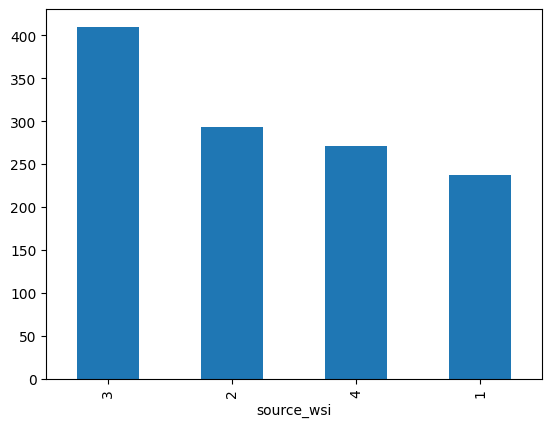

In [45]:
df2["source_wsi"].value_counts().plot(kind='bar')

<Axes: xlabel='source_wsi'>

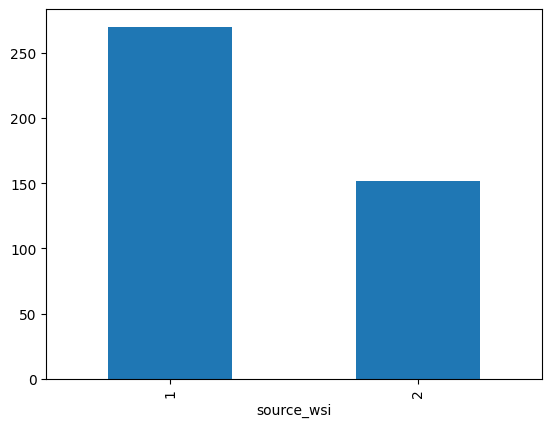

In [46]:
df1["source_wsi"].value_counts().plot(kind='bar')

In [47]:
df1_wsi1 = df1[df1["source_wsi"] == 1]
df1_wsi2 = df1[df1["source_wsi"] == 2]

In [48]:
ds1_dir = dataset_dir.joinpath(Path("ds1"))
ds1_dir.mkdir(parents=True, exist_ok=True)

In [49]:
df1_wsi1.to_csv(f'{ds1_dir.joinpath("ds1_wsi1.csv")}', index=False)
df1_wsi2.to_csv(f'{ds1_dir.joinpath("ds1_wsi2.csv")}', index=False)

<Axes: xlabel='source_wsi'>

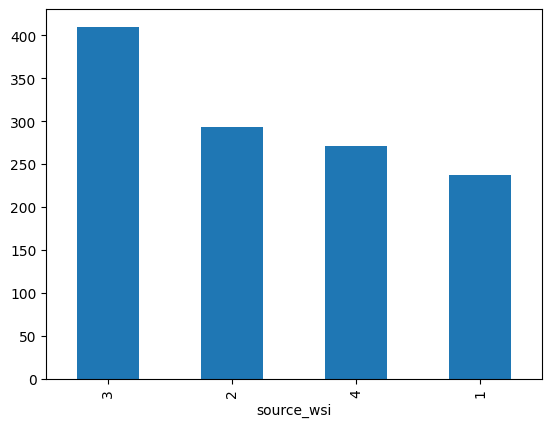

In [50]:
df2["source_wsi"].value_counts().plot(kind='bar')

In [51]:
df2_wsi1 = df2[df2["source_wsi"] == 1]
df2_wsi2 = df2[df2["source_wsi"] == 2]
df2_wsi3 = df2[df2["source_wsi"] == 3]
df2_wsi4 = df2[df2["source_wsi"] == 4]

In [52]:
ds2_dir = dataset_dir.joinpath(Path("ds2"))
ds2_dir.mkdir(parents=True, exist_ok=True)

In [53]:
df2_wsi1.to_csv(f'{ds2_dir.joinpath("ds2_wsi1.csv")}', index=False)
df2_wsi2.to_csv(f'{ds2_dir.joinpath("ds2_wsi2.csv")}', index=False)
df2_wsi3.to_csv(f'{ds2_dir.joinpath("ds2_wsi3.csv")}', index=False)
df2_wsi4.to_csv(f'{ds2_dir.joinpath("ds2_wsi4.csv")}', index=False)

In [54]:
# df1_wsi1, df1_wsi2

In [55]:
df1_wsi1["j"].describe()

count      270.000000
mean     42147.081481
std       2310.622038
min      38400.000000
25%      39936.000000
50%      41984.000000
75%      44032.000000
max      46592.000000
Name: j, dtype: float64

In [56]:
ds1_w1_w_mean = df1_wsi1["i"].mean()
ds1_w1_w_mean

6528.948148148148

In [57]:
df1_wsi1_left = df1_wsi1[df1_wsi1["i"] < int(ds1_w1_w_mean)]

In [58]:
df1_wsi1_right = df1_wsi1[df1_wsi1["i"] > int(ds1_w1_w_mean) + 512]

In [59]:
df1_wsi1_ignore = df1_wsi1[(df1_wsi1["i"] <= int(ds1_w1_w_mean) + 512) & (df1_wsi1["i"] > int(ds1_w1_w_mean))]

In [60]:
df1_wsi1_ignore

,id,source_wsi,dataset,i,j
533,12ab9ac0fc55,1,1,6656,44544
1947,454cf72a9ed9,1,1,6656,41472
2392,564283be4af8,1,1,6656,39936
3189,7392e21e0fe2,1,1,6656,42496
3446,7c58b92324f7,1,1,6656,45568
3507,7e72cf2b43bf,1,1,6656,43520
4507,a3ebac2db19d,1,1,6656,40448
4566,a60200ee318c,1,1,6656,38400
4614,a7a03dcb5485,1,1,6656,39424
4652,a9653f16e0b6,1,1,6656,43008


In [61]:
df1_wsi2["i"].describe()

count      152.000000
mean     22389.894737
std       3995.143090
min      15872.000000
25%      18944.000000
50%      22272.000000
75%      25600.000000
max      30208.000000
Name: i, dtype: float64

In [62]:
ds1_w2_w_mean = np.quantile(df1_wsi2["i"], 0.5)

In [63]:
df1_wsi2_left = df1_wsi2[df1_wsi2["i"] < int(ds1_w2_w_mean)]
df1_wsi2_right = df1_wsi2[df1_wsi2["i"] > int(ds1_w2_w_mean) + 512]

In [64]:
df1_wsi2_left

,id,source_wsi,dataset,i,j
207,06b972c417e7,2,1,17920,22016
222,0754412b2917,2,1,16896,22016
313,0a5be90855e3,2,1,18944,22528
322,0acd70e887b3,2,1,16896,21504
339,0b89ab7f9f07,2,1,16384,23040
...,...,...,...,...,...
6373,e72ed3bd99b5,2,1,16896,23040
6430,e93185008c33,2,1,20480,22016
6706,f38f2f72a1b7,2,1,19968,23552
6814,f73b7aca41d4,2,1,18944,20992


In [65]:
df1_wsi2_right

,id,source_wsi,dataset,i,j
17,0067d5ad2250,2,1,23552,22528
239,07bdbe578ded,2,1,23040,22016
283,097dd2ed6c14,2,1,23040,23040
309,0a43459733e7,2,1,24064,23040
370,0c3086bd8efb,2,1,25600,20992
...,...,...,...,...,...
6272,e3c41ad419a2,2,1,26624,23552
6377,e7473674d813,2,1,27136,23040
6425,e8ff12a57773,2,1,27648,22016
6515,ec963d44976f,2,1,25088,23552


In [66]:
df1_wsi2_ignore = df1_wsi2[(df1_wsi2["i"] <= int(ds1_w2_w_mean) + 512) & (df1_wsi2["i"] > int(ds1_w2_w_mean))]

In [67]:
df1_wsi2_ignore

,id,source_wsi,dataset,i,j
338,0b849dde56be,2,1,22528,22016
2531,5aae1d92e0af,2,1,22528,23552
2905,68e0e9974b36,2,1,22528,23040
4013,911b753ffe47,2,1,22528,20992
6689,f2a31831f412,2,1,22528,21504


In [68]:
ds1_kfold_dir = dataset_dir.joinpath(Path("ds1_kfold"))
ds1_kfold_dir.mkdir(parents=True, exist_ok=True)

In [69]:
df1_wsi1_left.to_csv(f'{ds1_kfold_dir.joinpath("ds1_wsi1_left.csv")}', index=False)
df1_wsi1_right.to_csv(f'{ds1_kfold_dir.joinpath("ds1_wsi1_right.csv")}', index=False)
df1_wsi1_ignore.to_csv(f'{ds1_kfold_dir.joinpath("ds1_wsi1_ignore.csv")}', index=False)

In [70]:
df1_wsi2_left.to_csv(f'{ds1_kfold_dir.joinpath("ds1_wsi2_left.csv")}', index=False)
df1_wsi2_right.to_csv(f'{ds1_kfold_dir.joinpath("ds1_wsi2_right.csv")}', index=False)
df1_wsi2_ignore.to_csv(f'{ds1_kfold_dir.joinpath("ds1_wsi2_ignore.csv")}', index=False)

In [71]:
len(df1_wsi1_left), len(df1_wsi1_right), len(df1_wsi1_ignore)

(128, 127, 15)

In [72]:
len(df1_wsi2_left), len(df1_wsi2_right), len(df1_wsi2_ignore)

(76, 71, 5)